In [6]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  


# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


In [7]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_US = df_DA_US.dropna(subset=['salary_year_avg'])

df_DA_US_exploded = df_DA_US.explode('job_skills')

df_DA_US_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
109,89000.0,python
109,89000.0,r
109,89000.0,alteryx
109,89000.0,tableau
180,90250.0,excel


In [8]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_skills = df_DA_US_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_skills = df_DA_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_job_count = len(df_DA_US)  # Find count of Data Analyst jobs in US with salary info

df_DA_skills['skill_percent'] = df_DA_skills['skill_count'] / DA_job_count * 100

df_DA_skills = df_DA_skills[df_DA_skills['skill_count'] > 0]

df_DA_skills


,skill_count,median_salary,skill_percent
job_skills,,,
sql,2508,91000.0,57.655172
excel,1808,84392.0,41.563218
python,1431,97500.0,32.896552
tableau,1364,92875.0,31.356322
sas,926,90000.0,21.287356
...,...,...,...
theano,1,100000.0,0.022989
typescript,1,65000.0,0.022989
vmware,1,147500.0,0.022989


In [9]:
skill_limit = 5

df_DA_skills_high_demand = df_DA_skills[df_DA_skills['skill_percent'] > skill_limit]

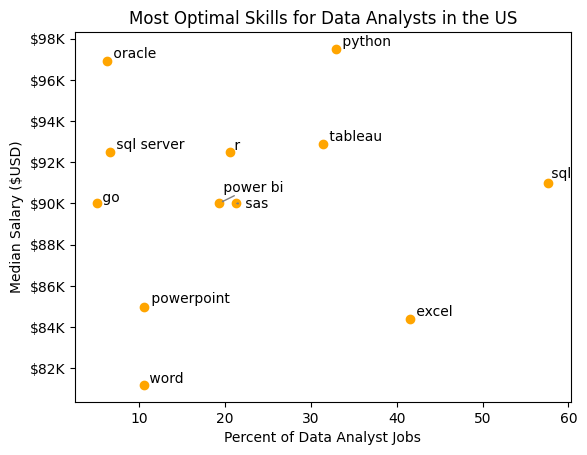

In [10]:
from adjustText import adjust_text

plt.scatter(df_DA_skills_high_demand['skill_percent'], df_DA_skills_high_demand['median_salary'], color='orange')
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the US')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

In [11]:
df_DA_DE = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Germany')].copy()

# Drop NaN values from the 'salary_year_avg' column for accurate visualization
df_DA_DE = df_DA_DE.dropna(subset=['salary_year_avg'])

df_DA_DE_exploded = df_DA_DE.explode('job_skills')

df_DA_DE_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
20066,75067.5,r
20066,75067.5,python
20066,75067.5,java
20066,75067.5,c#
20066,75067.5,sql


In [12]:
# using df_DA find the count of skills and also the median salary for each skill
df_DA_DE_skills = df_DA_DE_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

df_DA_DE_skills = df_DA_DE_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

DA_DE_job_count = len(df_DA_DE)  # Find count of Data Analyst jobs in US with salary info

df_DA_DE_skills['skill_percent'] = df_DA_DE_skills['skill_count'] / DA_DE_job_count * 100

df_DA_DE_skills = df_DA_DE_skills[df_DA_DE_skills['skill_count'] > 0]

df_DA_DE_skills

,skill_count,median_salary,skill_percent
job_skills,,,
sql,24,101500.00,50.000000
python,18,111175.00,37.500000
tableau,13,100500.00,27.083333
excel,7,105650.00,14.583333
r,7,75067.50,14.583333
spark,7,111175.00,14.583333
looker,5,53014.00,10.416667
pandas,4,108412.50,8.333333
go,4,52014.00,8.333333


In [13]:
skill_limit = 5

df_DA_DE_skills_high_demand = df_DA_DE_skills[df_DA_DE_skills['skill_percent'] > skill_limit]

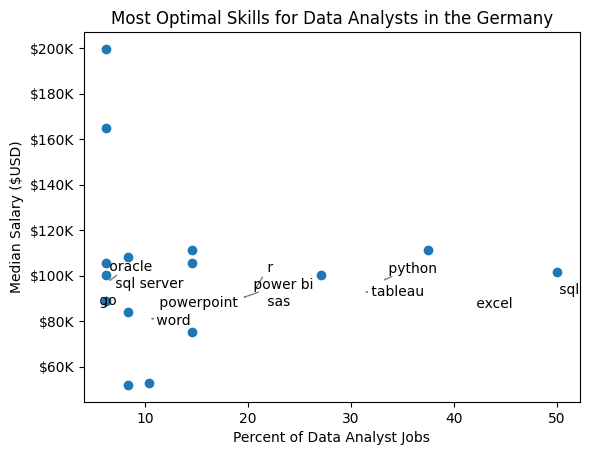

In [14]:
from adjustText import adjust_text

plt.scatter(df_DA_DE_skills_high_demand['skill_percent'], df_DA_DE_skills_high_demand['median_salary'])
plt.xlabel('Percent of Data Analyst Jobs')
plt.ylabel('Median Salary ($USD)')  # Assuming this is the label you want for y-axis
plt.title('Most Optimal Skills for Data Analysts in the Germany')

# Get current axes, set limits, and format axes
ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))  # Example formatting y-axis

# Add labels to points and collect them in a list
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(plt.text(df_DA_skills_high_demand['skill_percent'].iloc[i], df_DA_skills_high_demand['median_salary'].iloc[i], " " + txt))

# Adjust text to avoid overlap and add arrows
adjust_text(texts, arrowprops=dict(arrowstyle='->', color='gray'))

plt.show()

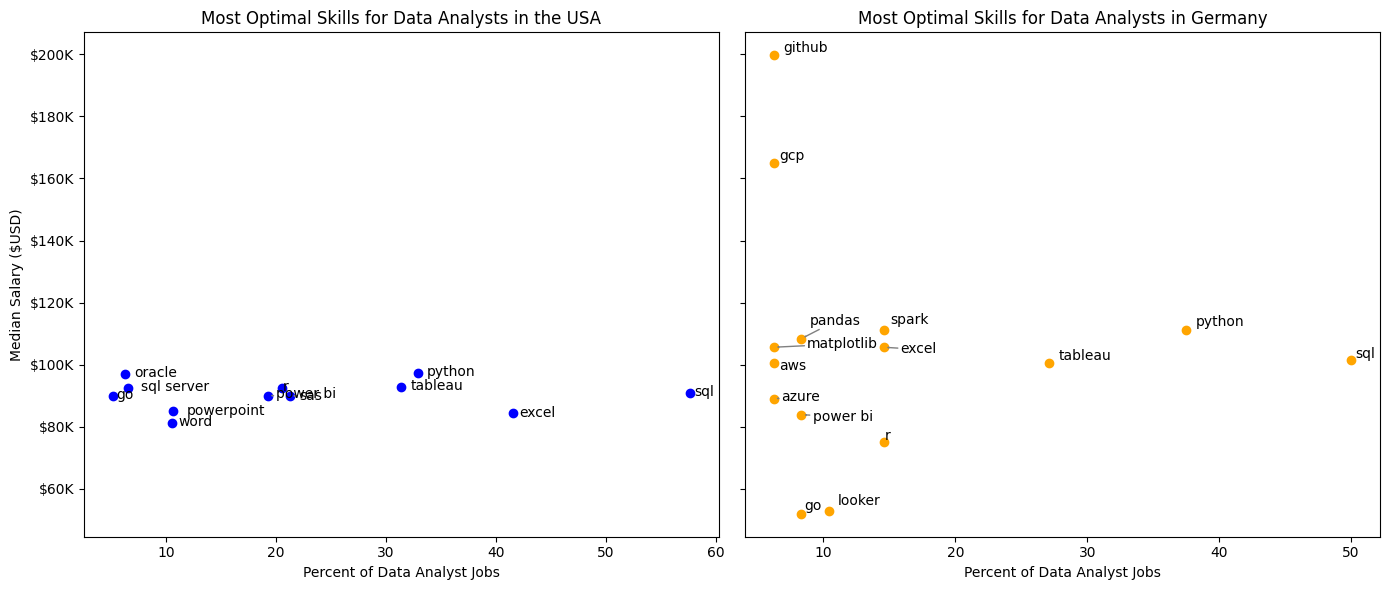

In [15]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)  # Two subplots side by side

# 🔹 PLOT FOR THE USA
axes[0].scatter(df_DA_skills_high_demand['skill_percent'], 
                df_DA_skills_high_demand['median_salary'], 
                color='blue', label='USA')

axes[0].set_title('Most Optimal Skills for Data Analysts in the USA')
axes[0].set_xlabel('Percent of Data Analyst Jobs')
axes[0].set_ylabel('Median Salary ($USD)')

# Add labels to data points
texts = []
for i, txt in enumerate(df_DA_skills_high_demand.index):
    texts.append(axes[0].text(df_DA_skills_high_demand['skill_percent'].iloc[i], 
                              df_DA_skills_high_demand['median_salary'].iloc[i], 
                              txt))

adjust_text(texts, ax=axes[0], arrowprops=dict(arrowstyle='->', color='gray'))

# 🔹 PLOT FOR GERMANY
axes[1].scatter(df_DA_DE_skills_high_demand['skill_percent'], 
                df_DA_DE_skills_high_demand['median_salary'], 
                color='orange', label='Germany')

axes[1].set_title('Most Optimal Skills for Data Analysts in Germany')
axes[1].set_xlabel('Percent of Data Analyst Jobs')

# Add labels to data points
texts = []
for i, txt in enumerate(df_DA_DE_skills_high_demand.index):
    texts.append(axes[1].text(df_DA_DE_skills_high_demand['skill_percent'].iloc[i], 
                              df_DA_DE_skills_high_demand['median_salary'].iloc[i], 
                              txt))

adjust_text(texts, ax=axes[1], arrowprops=dict(arrowstyle='->', color='gray'))

# Format the Y-axis for both subplots
for ax in axes:
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))

plt.tight_layout()
plt.show()

